#CIS5450 Group Project
#—COVID-19 pandemic influence on Airbnb listing price and user behavior
Group Member: Eddie Shen, Peng Wang, Yuting Sun



**Project Plan**
<br>
We are interested in investigating how COVID and COVID policy affect prices and customer reviews of Airbnb listings, based on pre-pandemic (2019), in-pandemic (2020) and post-pandemic (2022) Airbnb listings and reviews data.<br><br>
**Methods and Models**<br>
Hypothesis *t*-test (for price and sentiment score)<br>
Linear Regression Model (for continuous variables)<br>
Logistic Regression Model (for categorical variables)<br>
Natural Language Processing (NLP) (to calculate sentiment of each review data)<br>
Machine Learning(for general purpose)<br><br>
**Value Proposition**<br>
We are gaining insights about how a major event (i.e., COVID-19) could influence people’s travel behavior, vacation housing price, and the longevity of hosts.<br><br>
**Data Source**<br>
We are using Airbnb datasets as our resource for this project. <br>
Post-COVID Data (12/2021 - 09/2022): http://insideairbnb.com/get-the-data/<br>
In-COVID Data (10/2020): 
https://www.kaggle.com/datasets/kritikseth/us-airbnb-open-data?q=airbnb+dataset<br>
Pre-COVID Data (07/2019):
https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv<br>
There are three major kinds of datasets we are going to investigate: listings.csv, reviews.csv, and calendar.csv.




##1 Data Collecting and Pre-processing

###1.1 Import nessasary modules for data processing

In [ ]:
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###1.2 Importing data

In [ ]:
cd /content/drive/Shareddrives/545dataset/Data

/content/drive/Shareddrives/545dataset/Data


In [ ]:
# reading cvs file
# us_20_df = pd.read_csv('AB_US_2020.csv')
# newyork_19_df = pd.read_csv('AB_NYC_2019.csv')
# newyork_2112_df = pd.read_csv('NY_202112.csv')
# newyork_2203_df = pd.read_csv('NY_202203.csv')
# newyork_2206_df = pd.read_csv('NY_202206.csv')
# newyork_2209_df = pd.read_csv('NY_202209.csv')
reviews_2209_df = pd.read_csv('NY_202209_reviews.csv')

In [ ]:
reviews_2209_df.head(15)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2539,55688172,2015-12-04,25160947,Peter,Great host
1,2539,97474898,2016-08-27,91513326,Liz,Nice room for the price. Great neighborhood. J...
2,2539,105340344,2016-10-01,90022459,Евгений,Very nice apt. New remodeled.
3,2539,133131670,2017-02-20,116165195,George,Great place to stay for a while. John is a gre...
4,2539,138349776,2017-03-19,118432644,Carlos,.
5,2539,157777930,2017-06-04,1806142,Isaac,I really enjoyed my time here in deep south Br...
6,2539,194787986,2017-09-17,149989346,Amy,John was a great host. He was very responsive ...
7,2539,292241108,2018-07-17,64678596,Dahn,"Clean, quiet, well-run home, very close to the..."
8,2539,338504734,2018-10-19,3560397,Cem,John was always responsive during my stay. He ...
9,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...


##2 EDA(Exploratory Data Analysis)

###2.1 Data Wrangling and Cleaning

In [ ]:
newyork_20_df = us_20_df[us_20_df['city'] == 'New York City'].drop(columns=['city'])
newyork_20_df.describe()

NameError: ignored

In [ ]:
#unify the cols with 19 and 20
newyork_2112_df = newyork_2112_df.drop(columns=['number_of_reviews_ltm','license'])
newyork_2203_df = newyork_2203_df.drop(columns=['number_of_reviews_ltm','license'])
newyork_2206_df = newyork_2206_df.drop(columns=['number_of_reviews_ltm','license'])
newyork_2209_df = newyork_2209_df.drop(columns=['number_of_reviews_ltm','license'])

In [ ]:
print('newyork19 unique cols: \n',newyork_19_df.columns.unique())
print('newyork20 unique cols: \n',newyork_20_df.columns.unique())
print('newyork2112 unique cols: \n',newyork_2112_df.columns.unique())
print('newyork2203 unique cols: \n',newyork_2203_df.columns.unique())
print('newyork2206 unique cols: \n',newyork_2206_df.columns.unique())
print('newyork2209 unique cols: \n',newyork_2209_df.columns.unique())

newyork19 unique cols: 
 Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
newyork20 unique cols: 
 Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
newyork2112 unique cols: 
 Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'h

After reviewing our datasets, we selected columns of the dataset which are not useful to our analysis. These columns including urls and pictures of hosts and listings.

In [ ]:
columns_to_remove = ['listing_url', 'scrape_id', 'last_scraped','neighbor_overview', 'source', 'picture_url', 'host_url', 'host_name',
                     'host_about', 'host_thumbnail_url', 'host_picture_url','calendar_last_scraped']

In [ ]:
newyork_2209_df.host_neighbourhood.head()

0             Gravesend
1               Midtown
2    Bedford-Stuyvesant
3             Ridgewood
4     Greenwood Heights
Name: host_neighbourhood, dtype: object

In [ ]:
#newyork_19_df.describe()
#newyork_20_df.describe()
#newyork_2112_df.describe()
#newyork_2203_df.describe()
#newyork_2206_df.describe()
newyork_2209_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.988100e+04,3.988100e+04,3.988100e+04,39831.000000,39831.000000,39881.000000,39881.000000,39881.000000,0.0,36098.000000,...,31066.000000,31052.000000,31061.000000,31049.000000,31049.000000,39881.000000,39881.000000,39881.000000,39881.000000,31519.000000
mean,1.162303e+17,2.022091e+13,1.313420e+08,68.147096,91.357937,40.728870,-73.945665,2.932549,NaN,1.362264,...,4.632340,4.815535,4.810018,4.742148,4.651498,16.931396,10.309471,6.486322,0.061884,1.244733
std,2.465197e+17,0.000000e+00,1.455674e+08,443.617582,571.165811,0.058623,0.057870,1.996289,NaN,0.730447,...,0.542328,0.414543,0.439630,0.408590,0.489302,59.597136,51.753904,31.059683,0.677539,1.991702
min,2.539000e+03,2.022091e+13,2.438000e+03,1.000000,1.000000,40.500314,-74.269520,0.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.633197e+07,2.022091e+13,1.363938e+07,1.000000,1.000000,40.687760,-73.983340,2.000000,NaN,1.000000,...,4.500000,4.800000,4.800000,4.660000,4.560000,1.000000,0.000000,0.000000,0.000000,0.140000
50%,3.823683e+07,2.022091e+13,5.974663e+07,2.000000,3.000000,40.724545,-73.953710,2.000000,NaN,1.000000,...,4.800000,4.950000,4.960000,4.860000,4.780000,1.000000,1.000000,0.000000,0.000000,0.560000
75%,5.255780e+07,2.022091e+13,2.233746e+08,4.000000,7.000000,40.763200,-73.925600,4.000000,NaN,2.000000,...,5.000000,5.000000,5.000000,5.000000,4.980000,4.000000,1.000000,1.000000,0.000000,1.790000
max,7.098549e+17,2.022091e+13,4.782606e+08,4022.000000,6958.000000,40.928810,-73.690060,16.000000,NaN,13.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,453.000000,453.000000,288.000000,19.000000,123.000000


In [ ]:
#newyork_19_df.head()
#newyork_20_df.head()
#newyork_2112_df.head()
#newyork_2203_df.head()
#newyork_2206_df.head()
newyork_2209_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20220907064715,2022-09-07,city scrape,Clean & quiet apt home by the park,Renovated apt home in elevator building.<br />...,Close to Prospect Park and Historic Ditmas Park,https://a0.muscache.com/pictures/3949d073-a02e...,2787,...,5.00,5.00,4.75,4.88,f,9,1,6,2,0.11
1,2595,https://www.airbnb.com/rooms/2595,20220907064715,2022-09-07,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,...,4.77,4.80,4.81,4.40,f,3,3,0,0,0.31
2,5121,https://www.airbnb.com/rooms/5121,20220907064715,2022-09-07,city scrape,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,...,4.91,4.91,4.47,4.52,f,2,0,2,0,0.31
3,45910,https://www.airbnb.com/rooms/45910,20220907064715,2022-09-07,city scrape,Beautiful Queens Brownstone! - 5BR,"<b>The space</b><br />Beautiful, fully furnish...",NaN,https://a0.muscache.com/pictures/27117627/19ff...,204539,...,4.82,5.00,4.82,4.55,f,6,6,0,0,0.10
4,5136,https://www.airbnb.com/rooms/5136,20220907064715,2022-09-07,city scrape,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,5.00,5.00,4.67,5.00,f,1,1,0,0,0.03


In [ ]:
newyork_2209_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39881 entries, 0 to 39880
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            39881 non-null  int64  
 1   listing_url                                   39881 non-null  object 
 2   scrape_id                                     39881 non-null  int64  
 3   last_scraped                                  39881 non-null  object 
 4   source                                        39881 non-null  object 
 5   name                                          39868 non-null  object 
 6   description                                   39036 non-null  object 
 7   neighborhood_overview                         23466 non-null  object 
 8   picture_url                                   39881 non-null  object 
 9   host_id                                       39881 non-null 

In [ ]:
# try to merge the 19 and 20 data on id, see if they are matched
newyork_19_df.merge(newyork_20_df, on='id')

,id,name_x,host_id_x,host_name_x,neighbourhood_group_x,neighbourhood_x,latitude_x,longitude_x,room_type_x,price_x,...,latitude_y,longitude_y,room_type_y,price_y,minimum_nights_y,number_of_reviews_y,last_review_y,reviews_per_month_y,calculated_host_listings_count_y,availability_365_y
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,40.75362,-73.98377,Entire home/apt,175,3,48,04/11/19,0.37,2,365
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,40.68514,-73.95976,Entire home/apt,76,1,349,23/08/20,4.82,1,272
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,...,40.68688,-73.95596,Private room,60,29,50,02/12/19,0.36,1,365
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,...,40.76489,-73.98493,Private room,79,2,473,15/03/20,3.42,1,346
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,...,40.80178,-73.96723,Private room,75,2,118,21/07/17,0.88,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31170,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,...,40.75606,-73.96748,Entire home/apt,200,6,8,02/01/20,0.61,1,179
31171,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,...,40.67853,-73.94995,Private room,70,2,3,21/10/19,0.27,1,90
31172,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,...,40.70184,-73.93317,Private room,50,4,1,16/08/19,0.08,2,0
31173,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,...,40.81476,-73.95045,Entire home/apt,90,7,0,NaN,NaN,1,0


###2.2 listing price trend in different years

###2.3 Correlation of features variables
We would want to look at the relation between the features to understand the data in a more comprehensive way. Starting from overall relationship of numerical columns to see if there're highly correlative features, then we would want analysis for the detail of some specific features, i.e.

####2.3.1 Overall correlations 


###2.4 reviews trend in different years

####2.4.1 We want to see how many reviews per listing throughout the years. Create a seperated table that has listing ID and number of reviews per listing.

In [ ]:
reviews_2209_df['reviews_per_listing'] = reviews_2209_df['listing_id']

In [ ]:
reviews_per_listing = reviews_2209_df.groupby(['listing_id'])['reviews_per_listing'].count().reset_index()

####2.4.2 We want to seperated time frame into each years. One is 2019 which is before covid one is which is 2020.

In [ ]:
before_2020_df = reviews_2209_df[reviews_2209_df['date'] < '2020-01-01']

In [ ]:
review_2019_df = before_2020_df[before_2020_df['date'] > '2018-12-31']

In [ ]:
after_2020_df = reviews_2209_df[reviews_2209_df['date'] >= '2020-01-01']

In [ ]:
review_2020_df = after_2020_df[after_2020_df['date'] < '2021-01-01']

In [ ]:
review_2022_df = after_2020_df[after_2020_df['date'] > '2021-12-31']

####2.4.3 how many reviews per listing before vs after

In [ ]:
count_2019 = review_2019_df.groupby(['listing_id'])['reviews_per_listing'].count().reset_index()

In [ ]:
count_2020 = review_2020_df.groupby(['listing_id'])['reviews_per_listing'].count().reset_index()

In [ ]:
count_2022 = review_2022_df.groupby(['listing_id'])['reviews_per_listing'].count().reset_index()

In [ ]:
count_2019_2020 = count_2019.merge(count_2020, how='inner', on='listing_id')
count_19_20_22 = count_2019_2020.merge(count_2022, how='inner', on='listing_id')

In [ ]:
count_19_20_22

,listing_id,reviews_per_listing_x,reviews_per_listing_y,reviews_per_listing
0,5178,52,14,36
1,5803,14,6,11
2,6848,56,6,3
3,7097,42,20,20
4,8490,33,10,11
...,...,...,...,...
5263,41006656,2,8,10
5264,41008859,2,23,5
5265,41010332,1,1,8
5266,41740615,1,12,7


Find listings that have number of reviews either grow or shrink through the breakout of the Covid.

In [ ]:
count_19_20_22 = count_19_20_22.rename(columns={"reviews_per_listing_x": "reviews_2019", "reviews_per_listing_y": "reviews_2020", 
                                              "reviews_per_listing":"reviews_2022"})

In [ ]:
count_19_20_22[count_19_20_22['reviews_2019'] > count_19_20_22['reviews_2020']]

,listing_id,reviews_2019,reviews_2020,reviews_2022
0,5178,52,14,36
1,5803,14,6,11
2,6848,56,6,3
3,7097,42,20,20
4,8490,33,10,11
...,...,...,...,...
5163,39929061,2,1,2
5165,39943815,8,6,27
5196,40304217,10,7,10
5205,40368139,4,2,11


2022 reviews
boxplot


```
# This is formatted as code
```



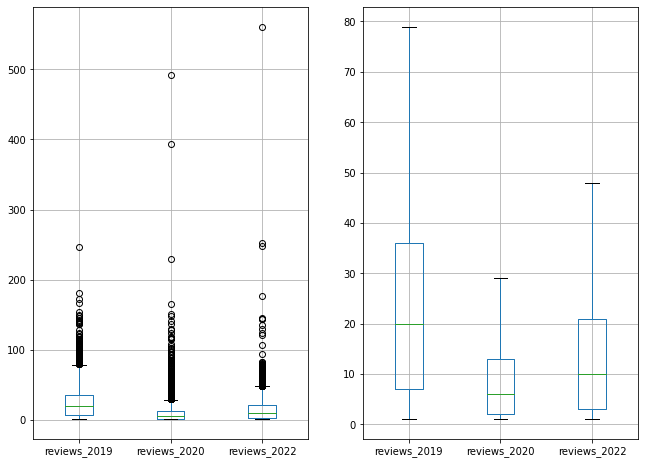

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)

count_19_20_22.drop(columns='listing_id').boxplot(ax=ax1)
count_19_20_22.drop(columns='listing_id').boxplot(showfliers=False, ax=ax2)
plt.subplots_adjust(left=0.0, right=1.4, bottom=0.0, top=1.5)

##3 Part1: Listing Price Before, In, and After COVID Pendemic

###3.1 EDA for Part1

###3.2 Listing price visualization

###3.3 Statistical Significant Test

###3.4 Conclusion for Part1

##4 Part2: Regression Analysis Based On Airbnb Features and Listing Price

###4.1 EDA for Part2

###4.2 Features Engingeering

###4.3 Linear Regression

###4.4 Logistic Regression

###4.5 Conclusion for Part2

##5 Part3: NLP (Natural Language Processing)of Airbnb Reviews

###5.1 Most Frequent Words

Create 3 word clouds of most common tokens in 2019, 2020, and 2022.
- Use **nltk.corpus.stopwords** to create a set containing the most common English stopwords.
- Implement the function **tokenized_content(content)**, which takes in a string and does the following:
1. Tokenize the text
2. Keep tokens that only contain alphabetic characters (i.e. tokens with no punctuation)
3. Convert each token to lowercase
4. Remove stopwords (commonly used words such as "a", "an", "in")

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# TODO: tokenize and flatten
from nltk.tokenize import word_tokenize
def tokenize_content(content):
  result = []
  for sent in content:
    words = nltk.word_tokenize(sent)
    words = [word.lower() for word in words if word.isalpha()]
    words = [word for word in words if word not in stopwords]
    for w in words:
      result.append(w)
  return result

Let's analyze all the review sentiments throughout 2019, 2020, and 2022.

In [ ]:
top_tokens_19 = tokenize_content(review_2019_df['comments'].astype(str))
top_tokens_20 = tokenize_content(review_2020_df['comments'].astype(str))
top_tokens_22 = tokenize_content(review_2022_df['comments'].astype(str))

Visualizations using the word cloud.

Create 3 word clouds containing all the words in the list `top_tokens_19`,`top_tokens_20`,`top_tokens_22`, respectively.

In [ ]:
# generate word cloud
from wordcloud import WordCloud
def word_cloud(top_tokens):
  unique_string=(" ").join(top_tokens)
  wc = WordCloud(background_color="white").generate(unique_string)
  return wc


Text(0.5, 1.0, '2022')

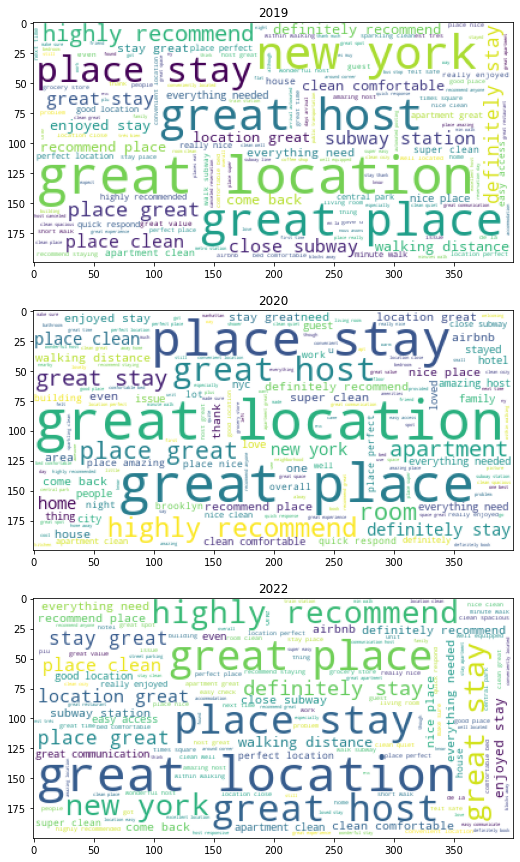

In [ ]:
# TODO: make a word cloud for top tokens for each year
row, col = 3, 1
fig = plt.figure(figsize=(15,15))
fig.add_subplot(row, col, 1)
plt.imshow(word_cloud(top_tokens_19))
plt.title('2019')
fig.add_subplot(row, col, 2)
plt.imshow(word_cloud(top_tokens_20))
plt.title('2020')
fig.add_subplot(row, col, 3)
plt.imshow(word_cloud(top_tokens_22))
plt.title('2022')

### 5.2 Sentiment Analysis

####5.2.1 get sentiment scores

Add a column to dataframe called sentiment, and calculate the sentiment associated with each review. Find the average of the sentiment score.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
def retrieve_sentiment(content):
  return sia.polarity_scores(str(content))['compound']

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
review_2019_df['sentiment'] = review_2019_df['comments'].apply(retrieve_sentiment)
review_2019_df

<ipython-input-89-54b6e308cfed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_2019_df['sentiment'] = review_2019_df['comments'].apply(retrieve_sentiment)


,listing_id,id,date,reviewer_id,reviewer_name,comments,reviews_per_listing,sentiment
51,2595,366477703,2019-01-02,165354250,Jacob,The apartment met expectations to how it was i...,2595,0.4580
52,2595,449815873,2019-05-07,168460710,Christopher,10 / 10 would stay again,2595,0.0000
53,2595,456489109,2019-05-21,119626931,Alex,Place was so cute and comfy! Host was great an...,2595,0.9549
54,2595,487972917,2019-07-14,60181725,Andrew,I'm glad I stayed here. I liked everything.<br...,2595,0.9693
55,2595,514642186,2019-08-21,33952280,Laura,"First of all I have to say, that Jennifer is n...",2595,-0.2495
...,...,...,...,...,...,...,...,...
852529,42384501,581649888,2019-12-25,266847933,Kady,Nice!,42384501,0.4753
852530,42384501,582191548,2019-12-26,315881058,Yaw,Nice place. Very clean.,42384501,0.6997
852531,42384501,582695605,2019-12-27,321195914,Collin,The place was okay,42384501,0.2263
852532,42384501,582762257,2019-12-27,83634706,Andres,NaN,42384501,0.0000


In [ ]:
review_2020_df['sentiment'] = review_2020_df['comments'].apply(retrieve_sentiment)
review_2020_df

<ipython-input-90-55f3bf5243bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_2020_df['sentiment'] = review_2020_df['comments'].apply(retrieve_sentiment)


,listing_id,id,date,reviewer_id,reviewer_name,comments,reviews_per_listing,sentiment
571,5178,587844402,2020-01-03,65352481,Chloe,"Great location, great amenities, great flexibi...",5178,0.8705
572,5178,592251184,2020-01-12,3951151,Lisa,Great location. Close to so much. Great value.,5178,0.8971
573,5178,598952933,2020-01-28,89282773,Andrzej,"Building was old, flat looked old too. I would...",5178,0.5411
574,5178,600353982,2020-02-01,42707708,Lucas,A true gem!!! I was on a solo trip to explore ...,5178,0.9890
575,5178,604840818,2020-02-12,33699962,Pat,Shunichi was an excellent host. He stayed up l...,5178,0.7506
...,...,...,...,...,...,...,...,...
903976,47227168,719443557,2020-12-29,246751103,Sharon,Amazing stay,47227168,0.5859
904182,47243424,719162219,2020-12-28,380650968,Alison,This place is very pretty its amazing.,47243424,0.8204
904183,47243424,719742360,2020-12-30,151320246,Anthony,It's a nice place to stay and great location.,47243424,0.7845
904436,47271575,720062074,2020-12-31,337075150,Md,It’s a good place to stay. JFK is about 15 min...,47271575,0.9659


In [ ]:
review_2022_df['sentiment'] = review_2022_df['comments'].apply(retrieve_sentiment)
review_2022_df

<ipython-input-91-d43cf2d944d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_2022_df['sentiment'] = review_2022_df['comments'].apply(retrieve_sentiment)


,listing_id,id,date,reviewer_id,reviewer_name,comments,reviews_per_listing,sentiment
57,2595,654331729052967030,2022-06-21,61404619,Raine,Jennifer's apartment is a well-cared for studi...,2595,0.9883
110,5136,690516472411031230,2022-08-10,9105377,Mark,Great place for my family while doing renovati...,5136,0.9682
625,5178,534003151985369782,2022-01-06,105629521,Déborah Suzane,Best of NYC! Close to Central Park and everyth...,5178,0.8743
626,5178,536900915424349561,2022-01-10,358731322,Tony,Great place,5178,0.6249
627,5178,542713477730419481,2022-01-18,229846316,Cynthia,El lugar tiene una ubicación inmejorable. Todo...,5178,0.0000
...,...,...,...,...,...,...,...,...
1064453,706487852182826405,707994213814611994,2022-09-03,179206698,Eman,Very tidy and lovely AirBnb studio equipped wi...,706487852182826405,0.9718
1064454,706611147133623424,707230144870147247,2022-09-02,339848823,David,The room is perfect for travelers like me who ...,706611147133623424,0.7351
1064455,706712410572332671,709394649699674170,2022-09-05,51119059,Caz,Loved staying here! It is a stunning place to ...,706712410572332671,0.9489
1064456,706752921121143414,709415974927452008,2022-09-05,456707191,Pablo,We really enjoyed our stay in Alberto's place....,706752921121143414,0.9080


In [ ]:
sentiment_22_df = review_2022_df[['listing_id', 'sentiment']].groupby(['listing_id']).mean().rename(columns={'sentiment':'2022'})
sentiment_20_df = review_2020_df[['listing_id', 'sentiment']].groupby(['listing_id']).mean().rename(columns={'sentiment':'2020'})
sentiment_19_df = review_2019_df[['listing_id', 'sentiment']].groupby(['listing_id']).mean().rename(columns={'sentiment':'2019'})

In [ ]:
sentiment_all_df = sentiment_22_df.merge(sentiment_20_df, on='listing_id').merge(sentiment_19_df, on='listing_id')
sentiment_all_df.describe()

,2022,2020,2019
count,5268.000000,5268.000000,5268.000000
mean,0.742340,0.739658,0.726097
std,0.203838,0.225755,0.165169
min,-0.982300,-0.991700,-0.659800
25%,0.656786,0.662660,0.649948
50%,0.783106,0.791424,0.749864
75%,0.881100,0.887813,0.834793
max,0.998900,0.997800,0.997900


####5.2.2 Hypothesis test and Visualization

Now, we get the review sentiment score for each listing house in different years, we can do a hypothesis test just like what we did in Part1.<br>

First, we want to have a look about the distribution of sentiment score in each year.

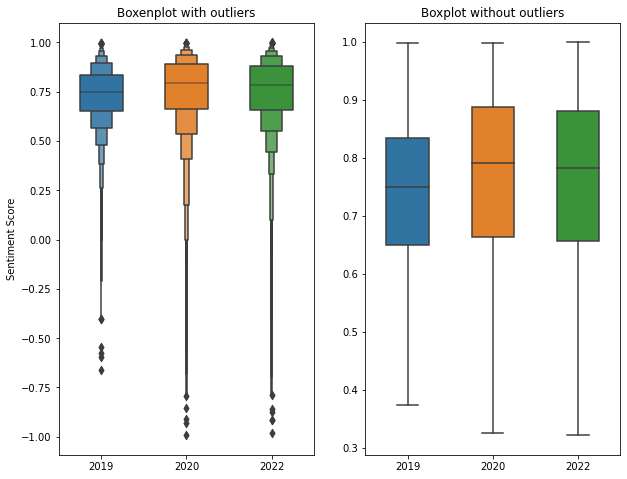

In [ ]:
# create 2 subplots
fig, (ax1, ax2) = plt.subplots(1,2)

sns.boxenplot(data=sentiment_all_df, ax=ax1, width=0.5)
sns.boxplot(data=sentiment_all_df, ax=ax2, width=0.5, showfliers=False)

# set titles
ax1.set_title("Boxenplot with outliers")
ax1.set_ylabel("Sentiment Score")
ax2.set_title("Boxplot without outliers")


# show plot
plt.subplots_adjust(left=0.0, right=1.3, bottom=0.0, top=1.5)
plt.show()

Since we already know that our merged data is more suitable for paired two-sample t-test (mentioned in `3.3`), we will just run the paired t-test towards the sentiment score and draw a box plot as a final visualization together.

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2019 v.s. 2020: t-test paired samples with Bonferroni correction, P_val=1.415e-04 stat=-3.977e+00
2020 v.s. 2022: t-test paired samples with Bonferroni correction, P_val=9.663e-01 stat=-7.013e-01


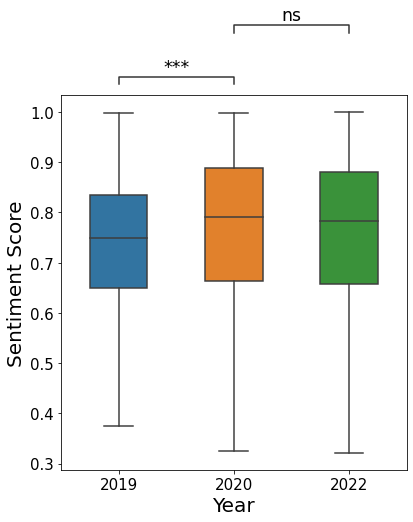

In [ ]:
# drawing the boxplot and using paired t-test
df = sentiment_all_df
order = ['2019', '2020', '2022']
# don't draw the outliers
ax = sns.boxplot(data=df, order=order, showfliers=False, width=0.5)
test_results = add_stat_annotation(ax, data=df, order=order,
                                   box_pairs=[("2019", "2020"), ("2020", "2022")],
                                   test='t-test_paired', text_format='star',
                                   loc='outside', fontsize='xx-large')
test_results

# set the x-title and y-title
plt.xlabel("Year", size=20)
plt.xticks(size=15)
plt.ylabel("Sentiment Score", size=20)
plt.yticks(size=15)


# show plot
plt.subplots_adjust(left=0.0, right=0.8, bottom=0.0, top=1.3)
plt.show()

From the `t-test result` and `box plot` above we can see a significant raising of review sentiment from 2019-to-2020, but no significant difference is found from 2020-to-2022. We can conclude that:
>**The Airbnb review sentiment experienced a significant  raising during the occurring of COVID-19 pandemic (from year 2019 to year 2020, p<0.01), then the review sentiment shows no difference during the ending of the COVID-19 pandemic (from year 2020 to year 2022, p>0.05).**

##6 Part4: Future Airbnb Listing Price Prediction

###6.1 EDA for Part4

###6.2 Neural Network of Predicting Model

###6.3 Future Listing Price Prediction

###6.4 Conclusion for Part4

##7 Conclusion